In [1]:
# load necessary packages
import os
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
import torch
import numpy as np

# 测试 Torch 是否能识别 Numpy
try:
    data = np.array([1, 2, 3])
    tensor = torch.from_numpy(data)
    print("✅ 成功！PyTorch 成功转换了 NumPy 数组：", tensor)
except Exception as e:
    print("❌ 依然报错：", e)


import rpy2


##from rpy2.robjects.packages import importr
##utils = importr('utils')
##utils.chooseCRANmirror(ind=1) # 选择第一个镜像源
##utils.install_packages('mclust')

✅ 成功！PyTorch 成功转换了 NumPy 数组： tensor([1, 2, 3])


In [3]:

# read data
#file_fold = 'path/to/the/dataset' #please replace 'file_fold' with the your path

file_fold = '/data/workspace/ST/0_data/Data_SpatialGlue/Dataset11_Human_Lymph_Node_A1/' #please replace 'file_fold' with the download path

adata_omics1 = sc.read_h5ad(file_fold + 'adata_RNA.h5ad')
adata_omics2 = sc.read_h5ad(file_fold + 'adata_ADT.h5ad')
adata_omics1.var_names_make_unique()
adata_omics2.var_names_make_unique()


/home/aizoo/miniconda3/envs/spabalance_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/aizoo/miniconda3/envs/spabalance_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:

# Specify data type
data_type = '10x' # '10x', SPOTS', 'Stereo-CITE-seq', and 'Spatial-epigenome-transcriptome'.

# Fix random seed0
from SpaBalance.preprocess import fix_seed
random_seed = 2022
fix_seed(random_seed)

from SpaBalance.preprocess import clr_normalize_each_cell, pca

# RNA
sc.pp.filter_genes(adata_omics1, min_cells=10)
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)
sc.pp.scale(adata_omics1)

adata_omics1_high =  adata_omics1[:, adata_omics1.var['highly_variable']]
adata_omics1.obsm['feat'] = pca(adata_omics1_high, n_comps=adata_omics2.n_vars-1)

# Protein
adata_omics2 = clr_normalize_each_cell(adata_omics2)
sc.pp.scale(adata_omics2)
adata_omics2.obsm['feat'] = pca(adata_omics2, n_comps=adata_omics2.n_vars-1)


In [5]:
adata_omics1

AnnData object with n_obs × n_vars = 3484 × 17954
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'
    obsm: 'spatial', 'feat'

In [6]:

from SpaBalance.preprocess import construct_neighbor_graph
data = construct_neighbor_graph(adata_omics1, adata_omics2, datatype=data_type)

# define model
from SpaBalance.Train_model import Train_SpaBalance
#model = Train_SpaBalance(data, datatype=data_type, device="cuda:0")# or "cpu"
model = Train_SpaBalance(data, datatype=data_type, device="cpu")# or "cpu"

# train model
output = model.train()
adata = adata_omics1
adata.obsm['SpaBalance'] = output['SpaBalance'].copy()


  0%|          | 1/200 [00:00<03:00,  1.10it/s]

Epoch 1/200, Loss: 137.47425842285156


  1%|          | 2/200 [00:01<02:50,  1.16it/s]

Epoch 2/200, Loss: 137.32569885253906


  2%|▏         | 3/200 [00:02<02:46,  1.18it/s]

Epoch 3/200, Loss: 137.2156982421875


  2%|▏         | 4/200 [00:03<02:43,  1.20it/s]

Epoch 4/200, Loss: 137.07386779785156


  2%|▎         | 5/200 [00:04<02:42,  1.20it/s]

Epoch 5/200, Loss: 136.9598846435547


  3%|▎         | 6/200 [00:05<02:41,  1.20it/s]

Epoch 6/200, Loss: 136.84170532226562


  4%|▎         | 7/200 [00:05<02:39,  1.21it/s]

Epoch 7/200, Loss: 136.70632934570312


  4%|▍         | 8/200 [00:06<02:40,  1.20it/s]

Epoch 8/200, Loss: 136.58409118652344


  4%|▍         | 9/200 [00:07<02:38,  1.20it/s]

Epoch 9/200, Loss: 136.47914123535156


  5%|▌         | 10/200 [00:08<02:38,  1.20it/s]

Epoch 10/200, Loss: 134.28721618652344


  6%|▌         | 11/200 [00:09<02:38,  1.20it/s]

Epoch 11/200, Loss: 136.27354431152344


  6%|▌         | 12/200 [00:10<02:36,  1.20it/s]

Epoch 12/200, Loss: 133.92359924316406


  6%|▋         | 13/200 [00:10<02:35,  1.20it/s]

Epoch 13/200, Loss: 133.81654357910156


  7%|▋         | 14/200 [00:11<02:35,  1.20it/s]

Epoch 14/200, Loss: 135.94827270507812


  8%|▊         | 15/200 [00:12<02:33,  1.21it/s]

Epoch 15/200, Loss: 135.84701538085938


  8%|▊         | 16/200 [00:13<02:31,  1.21it/s]

Epoch 16/200, Loss: 135.7303924560547


  8%|▊         | 17/200 [00:14<02:29,  1.22it/s]

Epoch 17/200, Loss: 133.04774475097656


  9%|▉         | 18/200 [00:14<02:28,  1.22it/s]

Epoch 18/200, Loss: 47.48776626586914


 10%|▉         | 19/200 [00:15<02:27,  1.23it/s]

Epoch 19/200, Loss: 132.800048828125


 10%|█         | 20/200 [00:16<02:26,  1.23it/s]

Epoch 20/200, Loss: 47.20819091796875


 10%|█         | 21/200 [00:17<02:25,  1.23it/s]

Epoch 21/200, Loss: 132.46607971191406


 11%|█         | 22/200 [00:18<02:25,  1.23it/s]

Epoch 22/200, Loss: 47.343910217285156


 12%|█▏        | 23/200 [00:19<02:24,  1.23it/s]

Epoch 23/200, Loss: 46.934513092041016


 12%|█▏        | 24/200 [00:19<02:23,  1.22it/s]

Epoch 24/200, Loss: 46.54892349243164


 12%|█▎        | 25/200 [00:20<02:23,  1.22it/s]

Epoch 25/200, Loss: 46.459747314453125


 13%|█▎        | 26/200 [00:21<02:22,  1.22it/s]

Epoch 26/200, Loss: 46.387794494628906


 14%|█▎        | 27/200 [00:22<02:21,  1.22it/s]

Epoch 27/200, Loss: 46.10729217529297


 14%|█▍        | 28/200 [00:23<02:21,  1.22it/s]

Epoch 28/200, Loss: 45.61800765991211


 14%|█▍        | 29/200 [00:23<02:19,  1.23it/s]

Epoch 29/200, Loss: 45.486167907714844


 15%|█▌        | 30/200 [00:24<02:18,  1.23it/s]

Epoch 30/200, Loss: 45.400718688964844


 16%|█▌        | 31/200 [00:25<02:17,  1.23it/s]

Epoch 31/200, Loss: 45.24067687988281


 16%|█▌        | 32/200 [00:26<02:15,  1.24it/s]

Epoch 32/200, Loss: 44.835533142089844


 16%|█▋        | 33/200 [00:27<02:13,  1.25it/s]

Epoch 33/200, Loss: 44.67359161376953


 17%|█▋        | 34/200 [00:27<02:12,  1.25it/s]

Epoch 34/200, Loss: 44.31282043457031


 18%|█▊        | 35/200 [00:28<02:11,  1.26it/s]

Epoch 35/200, Loss: 44.28715896606445


 18%|█▊        | 36/200 [00:29<02:10,  1.26it/s]

Epoch 36/200, Loss: 44.0208625793457


 18%|█▊        | 37/200 [00:30<02:09,  1.26it/s]

Epoch 37/200, Loss: 43.834754943847656


 19%|█▉        | 38/200 [00:31<02:09,  1.25it/s]

Epoch 38/200, Loss: 43.82438278198242


 20%|█▉        | 39/200 [00:31<02:10,  1.24it/s]

Epoch 39/200, Loss: 130.98898315429688


 20%|██        | 40/200 [00:32<02:09,  1.23it/s]

Epoch 40/200, Loss: 43.40598678588867


 20%|██        | 41/200 [00:33<02:09,  1.23it/s]

Epoch 41/200, Loss: 130.86842346191406


 21%|██        | 42/200 [00:34<02:08,  1.22it/s]

Epoch 42/200, Loss: 130.80392456054688


 22%|██▏       | 43/200 [00:35<02:07,  1.23it/s]

Epoch 43/200, Loss: 130.80377197265625


 22%|██▏       | 44/200 [00:36<02:07,  1.23it/s]

Epoch 44/200, Loss: 130.70997619628906


 22%|██▎       | 45/200 [00:36<02:05,  1.23it/s]

Epoch 45/200, Loss: 130.69049072265625


 23%|██▎       | 46/200 [00:37<02:04,  1.23it/s]

Epoch 46/200, Loss: 130.5716552734375


 24%|██▎       | 47/200 [00:38<02:04,  1.23it/s]

Epoch 47/200, Loss: 130.65272521972656


 24%|██▍       | 48/200 [00:39<02:03,  1.23it/s]

Epoch 48/200, Loss: 130.59295654296875


 24%|██▍       | 49/200 [00:40<02:02,  1.23it/s]

Epoch 49/200, Loss: 130.61927795410156


 25%|██▌       | 50/200 [00:40<02:02,  1.23it/s]

Epoch 50/200, Loss: 130.51071166992188


 26%|██▌       | 51/200 [00:41<02:01,  1.23it/s]

Epoch 51/200, Loss: 130.58599853515625


 26%|██▌       | 52/200 [00:42<02:00,  1.23it/s]

Epoch 52/200, Loss: 130.59841918945312


 26%|██▋       | 53/200 [00:43<02:00,  1.22it/s]

Epoch 53/200, Loss: 130.69862365722656


 27%|██▋       | 54/200 [00:44<01:59,  1.22it/s]

Epoch 54/200, Loss: 130.68173217773438


 28%|██▊       | 55/200 [00:44<01:58,  1.22it/s]

Epoch 55/200, Loss: 130.68801879882812


 28%|██▊       | 56/200 [00:45<01:58,  1.22it/s]

Epoch 56/200, Loss: 130.67593383789062


 28%|██▊       | 57/200 [00:46<01:57,  1.21it/s]

Epoch 57/200, Loss: 130.77304077148438


 29%|██▉       | 58/200 [00:47<01:57,  1.20it/s]

Epoch 58/200, Loss: 130.6966552734375


 30%|██▉       | 59/200 [00:48<01:57,  1.20it/s]

Epoch 59/200, Loss: 130.72862243652344


 30%|███       | 60/200 [00:49<01:57,  1.20it/s]

Epoch 60/200, Loss: 130.72647094726562


 30%|███       | 61/200 [00:50<01:56,  1.19it/s]

Epoch 61/200, Loss: 130.790283203125


 31%|███       | 62/200 [00:50<01:56,  1.19it/s]

Epoch 62/200, Loss: 130.7324981689453


 32%|███▏      | 63/200 [00:51<01:55,  1.19it/s]

Epoch 63/200, Loss: 130.7158660888672


 32%|███▏      | 64/200 [00:52<01:54,  1.19it/s]

Epoch 64/200, Loss: 130.79542541503906


 32%|███▎      | 65/200 [00:53<01:53,  1.19it/s]

Epoch 65/200, Loss: 130.65682983398438


 33%|███▎      | 66/200 [00:54<01:52,  1.19it/s]

Epoch 66/200, Loss: 130.67291259765625


 34%|███▎      | 67/200 [00:55<01:52,  1.18it/s]

Epoch 67/200, Loss: 130.67271423339844


 34%|███▍      | 68/200 [00:55<01:50,  1.19it/s]

Epoch 68/200, Loss: 130.6151885986328


 34%|███▍      | 69/200 [00:56<01:49,  1.20it/s]

Epoch 69/200, Loss: 130.59408569335938


 35%|███▌      | 70/200 [00:57<01:49,  1.19it/s]

Epoch 70/200, Loss: 130.5286865234375


 36%|███▌      | 71/200 [00:58<01:47,  1.20it/s]

Epoch 71/200, Loss: 130.5405731201172


 36%|███▌      | 72/200 [00:59<01:46,  1.20it/s]

Epoch 72/200, Loss: 130.4100799560547


 36%|███▋      | 73/200 [01:00<01:45,  1.20it/s]

Epoch 73/200, Loss: 130.46604919433594


 37%|███▋      | 74/200 [01:00<01:44,  1.21it/s]

Epoch 74/200, Loss: 130.42523193359375


 38%|███▊      | 75/200 [01:01<01:43,  1.21it/s]

Epoch 75/200, Loss: 130.33309936523438


 38%|███▊      | 76/200 [01:02<01:42,  1.21it/s]

Epoch 76/200, Loss: 130.26385498046875


 38%|███▊      | 77/200 [01:03<01:41,  1.21it/s]

Epoch 77/200, Loss: 130.18226623535156


 39%|███▉      | 78/200 [01:04<01:40,  1.22it/s]

Epoch 78/200, Loss: 130.2233428955078


 40%|███▉      | 79/200 [01:04<01:39,  1.22it/s]

Epoch 79/200, Loss: 130.21534729003906


 40%|████      | 80/200 [01:05<01:39,  1.21it/s]

Epoch 80/200, Loss: 130.13418579101562


 40%|████      | 81/200 [01:06<01:38,  1.20it/s]

Epoch 81/200, Loss: 129.99395751953125


 41%|████      | 82/200 [01:07<01:37,  1.20it/s]

Epoch 82/200, Loss: 129.97927856445312


 42%|████▏     | 83/200 [01:08<01:36,  1.21it/s]

Epoch 83/200, Loss: 130.0128173828125


 42%|████▏     | 84/200 [01:09<01:35,  1.21it/s]

Epoch 84/200, Loss: 129.87240600585938


 42%|████▎     | 85/200 [01:09<01:35,  1.21it/s]

Epoch 85/200, Loss: 129.896240234375


 43%|████▎     | 86/200 [01:10<01:34,  1.21it/s]

Epoch 86/200, Loss: 129.8019561767578


 44%|████▎     | 87/200 [01:11<01:32,  1.22it/s]

Epoch 87/200, Loss: 129.79200744628906


 44%|████▍     | 88/200 [01:12<01:31,  1.22it/s]

Epoch 88/200, Loss: 129.73873901367188


 44%|████▍     | 89/200 [01:13<01:30,  1.23it/s]

Epoch 89/200, Loss: 129.77554321289062


 45%|████▌     | 90/200 [01:14<01:29,  1.23it/s]

Epoch 90/200, Loss: 129.61062622070312


 46%|████▌     | 91/200 [01:14<01:28,  1.23it/s]

Epoch 91/200, Loss: 129.544677734375


 46%|████▌     | 92/200 [01:15<01:27,  1.24it/s]

Epoch 92/200, Loss: 129.57081604003906


 46%|████▋     | 93/200 [01:16<01:26,  1.24it/s]

Epoch 93/200, Loss: 129.53785705566406


 47%|████▋     | 94/200 [01:17<01:25,  1.24it/s]

Epoch 94/200, Loss: 129.46888732910156


 48%|████▊     | 95/200 [01:18<01:24,  1.24it/s]

Epoch 95/200, Loss: 129.420166015625


 48%|████▊     | 96/200 [01:18<01:23,  1.24it/s]

Epoch 96/200, Loss: 129.49069213867188


 48%|████▊     | 97/200 [01:19<01:22,  1.24it/s]

Epoch 97/200, Loss: 129.4076690673828


 49%|████▉     | 98/200 [01:20<01:22,  1.24it/s]

Epoch 98/200, Loss: 129.4053192138672


 50%|████▉     | 99/200 [01:21<01:21,  1.24it/s]

Epoch 99/200, Loss: 129.28680419921875


 50%|█████     | 100/200 [01:22<01:20,  1.24it/s]

Epoch 100/200, Loss: 129.37351989746094


 50%|█████     | 101/200 [01:22<01:19,  1.24it/s]

Epoch 101/200, Loss: 129.27151489257812


 51%|█████     | 102/200 [01:23<01:18,  1.25it/s]

Epoch 102/200, Loss: 129.22140502929688


 52%|█████▏    | 103/200 [01:24<01:17,  1.25it/s]

Epoch 103/200, Loss: 129.21575927734375


 52%|█████▏    | 104/200 [01:25<01:16,  1.25it/s]

Epoch 104/200, Loss: 129.20852661132812


 52%|█████▎    | 105/200 [01:26<01:16,  1.25it/s]

Epoch 105/200, Loss: 129.1607666015625


 53%|█████▎    | 106/200 [01:26<01:15,  1.24it/s]

Epoch 106/200, Loss: 129.11366271972656


 54%|█████▎    | 107/200 [01:27<01:15,  1.23it/s]

Epoch 107/200, Loss: 129.1002960205078


 54%|█████▍    | 108/200 [01:28<01:14,  1.24it/s]

Epoch 108/200, Loss: 129.0667724609375


 55%|█████▍    | 109/200 [01:29<01:13,  1.23it/s]

Epoch 109/200, Loss: 129.00254821777344


 55%|█████▌    | 110/200 [01:30<01:13,  1.23it/s]

Epoch 110/200, Loss: 128.99969482421875


 56%|█████▌    | 111/200 [01:30<01:12,  1.24it/s]

Epoch 111/200, Loss: 129.03587341308594


 56%|█████▌    | 112/200 [01:31<01:10,  1.24it/s]

Epoch 112/200, Loss: 128.96812438964844


 56%|█████▋    | 113/200 [01:32<01:13,  1.19it/s]

Epoch 113/200, Loss: 128.90792846679688


 57%|█████▋    | 114/200 [01:33<01:12,  1.19it/s]

Epoch 114/200, Loss: 128.8726806640625


 57%|█████▊    | 115/200 [01:34<01:11,  1.19it/s]

Epoch 115/200, Loss: 128.8509979248047


 58%|█████▊    | 116/200 [01:35<01:10,  1.19it/s]

Epoch 116/200, Loss: 128.82908630371094


 58%|█████▊    | 117/200 [01:36<01:09,  1.19it/s]

Epoch 117/200, Loss: 128.86415100097656


 59%|█████▉    | 118/200 [01:36<01:08,  1.19it/s]

Epoch 118/200, Loss: 128.8050537109375


 60%|█████▉    | 119/200 [01:37<01:07,  1.20it/s]

Epoch 119/200, Loss: 128.69973754882812


 60%|██████    | 120/200 [01:38<01:06,  1.21it/s]

Epoch 120/200, Loss: 128.71994018554688


 60%|██████    | 121/200 [01:39<01:05,  1.21it/s]

Epoch 121/200, Loss: 128.69105529785156


 61%|██████    | 122/200 [01:40<01:04,  1.21it/s]

Epoch 122/200, Loss: 128.69068908691406


 62%|██████▏   | 123/200 [01:41<01:03,  1.21it/s]

Epoch 123/200, Loss: 128.68389892578125


 62%|██████▏   | 124/200 [01:41<01:03,  1.20it/s]

Epoch 124/200, Loss: 128.6667938232422


 62%|██████▎   | 125/200 [01:42<01:01,  1.21it/s]

Epoch 125/200, Loss: 128.57760620117188


 63%|██████▎   | 126/200 [01:43<01:00,  1.21it/s]

Epoch 126/200, Loss: 128.56478881835938


 64%|██████▎   | 127/200 [01:44<01:00,  1.21it/s]

Epoch 127/200, Loss: 128.55787658691406


 64%|██████▍   | 128/200 [01:45<00:59,  1.21it/s]

Epoch 128/200, Loss: 128.51475524902344


 64%|██████▍   | 129/200 [01:45<00:58,  1.21it/s]

Epoch 129/200, Loss: 128.4910125732422


 65%|██████▌   | 130/200 [01:46<00:57,  1.21it/s]

Epoch 130/200, Loss: 128.4171905517578


 66%|██████▌   | 131/200 [01:47<00:57,  1.20it/s]

Epoch 131/200, Loss: 128.4249267578125


 66%|██████▌   | 132/200 [01:48<00:56,  1.21it/s]

Epoch 132/200, Loss: 128.34584045410156


 66%|██████▋   | 133/200 [01:49<00:55,  1.21it/s]

Epoch 133/200, Loss: 128.3252716064453


 67%|██████▋   | 134/200 [01:50<00:54,  1.21it/s]

Epoch 134/200, Loss: 128.2788543701172


 68%|██████▊   | 135/200 [01:50<00:53,  1.21it/s]

Epoch 135/200, Loss: 128.2835693359375


 68%|██████▊   | 136/200 [01:51<00:52,  1.21it/s]

Epoch 136/200, Loss: 128.2250213623047


 68%|██████▊   | 137/200 [01:52<00:52,  1.20it/s]

Epoch 137/200, Loss: 128.1758575439453


 69%|██████▉   | 138/200 [01:53<00:51,  1.20it/s]

Epoch 138/200, Loss: 128.19192504882812


 70%|██████▉   | 139/200 [01:54<00:50,  1.21it/s]

Epoch 139/200, Loss: 128.13482666015625


 70%|███████   | 140/200 [01:55<00:49,  1.21it/s]

Epoch 140/200, Loss: 128.0933837890625


 70%|███████   | 141/200 [01:55<00:49,  1.20it/s]

Epoch 141/200, Loss: 128.06932067871094


 71%|███████   | 142/200 [01:56<00:48,  1.21it/s]

Epoch 142/200, Loss: 128.05227661132812


 72%|███████▏  | 143/200 [01:57<00:47,  1.21it/s]

Epoch 143/200, Loss: 128.0350341796875


 72%|███████▏  | 144/200 [01:58<00:46,  1.22it/s]

Epoch 144/200, Loss: 128.0080108642578


 72%|███████▎  | 145/200 [01:59<00:45,  1.21it/s]

Epoch 145/200, Loss: 127.97733306884766


 73%|███████▎  | 146/200 [02:00<00:44,  1.22it/s]

Epoch 146/200, Loss: 128.00221252441406


 74%|███████▎  | 147/200 [02:00<00:43,  1.22it/s]

Epoch 147/200, Loss: 127.9251937866211


 74%|███████▍  | 148/200 [02:01<00:42,  1.23it/s]

Epoch 148/200, Loss: 127.92169952392578


 74%|███████▍  | 149/200 [02:02<00:41,  1.23it/s]

Epoch 149/200, Loss: 127.8880844116211


 75%|███████▌  | 150/200 [02:03<00:40,  1.23it/s]

Epoch 150/200, Loss: 127.88220977783203


 76%|███████▌  | 151/200 [02:04<00:39,  1.23it/s]

Epoch 151/200, Loss: 124.18025207519531


 76%|███████▌  | 152/200 [02:04<00:39,  1.22it/s]

Epoch 152/200, Loss: 124.16398620605469


 76%|███████▋  | 153/200 [02:05<00:38,  1.23it/s]

Epoch 153/200, Loss: 124.1437759399414


 77%|███████▋  | 154/200 [02:06<00:37,  1.23it/s]

Epoch 154/200, Loss: 124.1272964477539


 78%|███████▊  | 155/200 [02:07<00:36,  1.23it/s]

Epoch 155/200, Loss: 124.12183380126953


 78%|███████▊  | 156/200 [02:08<00:35,  1.25it/s]

Epoch 156/200, Loss: 124.10433959960938


 78%|███████▊  | 157/200 [02:08<00:34,  1.25it/s]

Epoch 157/200, Loss: 124.10429382324219


 79%|███████▉  | 158/200 [02:09<00:33,  1.25it/s]

Epoch 158/200, Loss: 124.08861541748047


 80%|███████▉  | 159/200 [02:10<00:32,  1.26it/s]

Epoch 159/200, Loss: 124.06803131103516


 80%|████████  | 160/200 [02:11<00:31,  1.26it/s]

Epoch 160/200, Loss: 124.0614013671875


 80%|████████  | 161/200 [02:12<00:31,  1.26it/s]

Epoch 161/200, Loss: 124.06190490722656


 81%|████████  | 162/200 [02:12<00:30,  1.26it/s]

Epoch 162/200, Loss: 124.05077362060547


 82%|████████▏ | 163/200 [02:13<00:29,  1.25it/s]

Epoch 163/200, Loss: 124.06399536132812


 82%|████████▏ | 164/200 [02:14<00:28,  1.25it/s]

Epoch 164/200, Loss: 124.06690979003906


 82%|████████▎ | 165/200 [02:15<00:28,  1.25it/s]

Epoch 165/200, Loss: 124.04533386230469


 83%|████████▎ | 166/200 [02:16<00:27,  1.23it/s]

Epoch 166/200, Loss: 124.06097412109375


 84%|████████▎ | 167/200 [02:16<00:27,  1.21it/s]

Epoch 167/200, Loss: 124.04911804199219


 84%|████████▍ | 168/200 [02:17<00:26,  1.20it/s]

Epoch 168/200, Loss: 124.02874755859375


 84%|████████▍ | 169/200 [02:18<00:25,  1.20it/s]

Epoch 169/200, Loss: 124.0235595703125


 85%|████████▌ | 170/200 [02:19<00:24,  1.21it/s]

Epoch 170/200, Loss: 124.01311492919922


 86%|████████▌ | 171/200 [02:20<00:23,  1.21it/s]

Epoch 171/200, Loss: 124.0074691772461


 86%|████████▌ | 172/200 [02:21<00:23,  1.17it/s]

Epoch 172/200, Loss: 124.00951385498047


 86%|████████▋ | 173/200 [02:22<00:22,  1.18it/s]

Epoch 173/200, Loss: 123.99267578125


 87%|████████▋ | 174/200 [02:22<00:21,  1.19it/s]

Epoch 174/200, Loss: 123.97570037841797


 88%|████████▊ | 175/200 [02:23<00:20,  1.19it/s]

Epoch 175/200, Loss: 123.94747161865234


 88%|████████▊ | 176/200 [02:24<00:20,  1.19it/s]

Epoch 176/200, Loss: 123.94439697265625


 88%|████████▊ | 177/200 [02:25<00:19,  1.19it/s]

Epoch 177/200, Loss: 123.93531799316406


 89%|████████▉ | 178/200 [02:26<00:18,  1.18it/s]

Epoch 178/200, Loss: 123.90105438232422


 90%|████████▉ | 179/200 [02:27<00:17,  1.19it/s]

Epoch 179/200, Loss: 123.89750671386719


 90%|█████████ | 180/200 [02:27<00:16,  1.19it/s]

Epoch 180/200, Loss: 123.89728546142578


 90%|█████████ | 181/200 [02:28<00:16,  1.17it/s]

Epoch 181/200, Loss: 123.86477661132812


 91%|█████████ | 182/200 [02:29<00:15,  1.17it/s]

Epoch 182/200, Loss: 123.84877014160156


 92%|█████████▏| 183/200 [02:30<00:14,  1.18it/s]

Epoch 183/200, Loss: 123.83390808105469


 92%|█████████▏| 184/200 [02:31<00:13,  1.19it/s]

Epoch 184/200, Loss: 123.79231262207031


 92%|█████████▎| 185/200 [02:32<00:12,  1.19it/s]

Epoch 185/200, Loss: 123.78605651855469


 93%|█████████▎| 186/200 [02:32<00:11,  1.19it/s]

Epoch 186/200, Loss: 123.7542495727539


 94%|█████████▎| 187/200 [02:33<00:10,  1.19it/s]

Epoch 187/200, Loss: 123.74337005615234


 94%|█████████▍| 188/200 [02:34<00:10,  1.18it/s]

Epoch 188/200, Loss: 123.7571029663086


 94%|█████████▍| 189/200 [02:35<00:09,  1.19it/s]

Epoch 189/200, Loss: 123.70475006103516


 95%|█████████▌| 190/200 [02:36<00:08,  1.19it/s]

Epoch 190/200, Loss: 123.69882202148438


 96%|█████████▌| 191/200 [02:37<00:07,  1.19it/s]

Epoch 191/200, Loss: 123.67053985595703


 96%|█████████▌| 192/200 [02:38<00:06,  1.19it/s]

Epoch 192/200, Loss: 123.66746520996094


 96%|█████████▋| 193/200 [02:38<00:05,  1.20it/s]

Epoch 193/200, Loss: 123.6445541381836


 97%|█████████▋| 194/200 [02:39<00:04,  1.20it/s]

Epoch 194/200, Loss: 123.6342544555664


 98%|█████████▊| 195/200 [02:40<00:04,  1.20it/s]

Epoch 195/200, Loss: 123.60702514648438


 98%|█████████▊| 196/200 [02:41<00:03,  1.15it/s]

Epoch 196/200, Loss: 123.57671356201172


 98%|█████████▊| 197/200 [02:42<00:02,  1.17it/s]

Epoch 197/200, Loss: 123.58897399902344


 99%|█████████▉| 198/200 [02:43<00:01,  1.19it/s]

Epoch 198/200, Loss: 123.5708999633789


100%|█████████▉| 199/200 [02:43<00:00,  1.20it/s]

Epoch 199/200, Loss: 123.54552459716797


100%|██████████| 200/200 [02:44<00:00,  1.21it/s]

Epoch 200/200, Loss: 123.55480194091797
Model training finished!



In [7]:
adata

AnnData object with n_obs × n_vars = 3484 × 17954
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'adj_spatial'
    obsm: 'spatial', 'feat', 'adj_feature', 'label_CSL', 'SpaBalance'

In [8]:
adata.obsm['emb_latent_omics1'] = output['emb_latent_omics1'].copy()
adata.obsm['emb_latent_omics2'] = output['emb_latent_omics2'].copy()
adata.obsm['omics1_pca_feat'] = adata_omics1.obsm['feat'].copy()
adata.obsm['omics2_pca_feat'] = adata_omics2.obsm['feat'].copy()

In [9]:
# we set 'mclust' as clustering tool by default. Users can also select 'leiden' and 'louvain'
from SpaBalance.utils import clustering
tool = 'mclust' # mclust, leiden, and louvain
clustering(adata, key='SpaBalance', add_key='SpaBalance', n_clusters=6, method=tool, use_pca=True)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


In [10]:
# 建议先检查一下聚类列名是否为你想要的名称
# adata.write(文件路径)
adata.write("adata_spabalance_test.h5ad")

In [11]:
import rpy2.robjects as robjects

# 运行 R 命令查看已安装包的版本
version = robjects.r('packageVersion("mclust")')
print(f"当前环境 mclust 的版本是: {version}")

当前环境 mclust 的版本是: [1] ‘5.4.10’



/home/aizoo/miniconda3/envs/spabalance_env2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


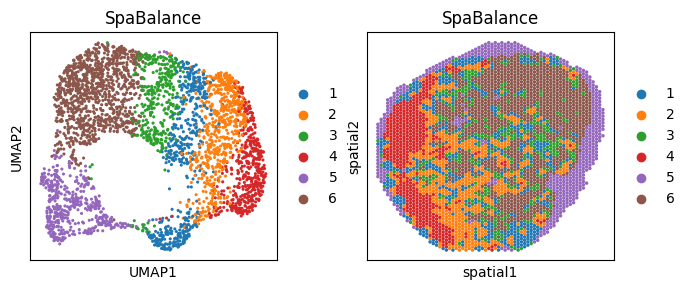

In [12]:

# visualization
import matplotlib.pyplot as plt
#fig, ax_list = plt.subplots(1, 2, figsize=(14, 5))
fig, ax_list = plt.subplots(1, 2, figsize=(7, 3))
sc.pp.neighbors(adata, use_rep='SpaBalance', n_neighbors=30)
sc.tl.umap(adata)

# use specified color to plot the UMAP
sc.pl.umap(adata, color='SpaBalance', ax=ax_list[0], title='SpaBalance', s=20, show=False)

# use specified basis to plot the spatial embedding
sc.pl.embedding(adata, basis='spatial', color='SpaBalance', ax=ax_list[1], title='SpaBalance', s=25, show=False)

plt.tight_layout(w_pad=0.3)
# save the figure
#output_path = "spaBalance_results.png"
#plt.savefig(output_path, dpi=300)  # save the figure as a PNG image with a resolution of 300 dpi
plt.show()

In [13]:
import scanpy as sc
import pandas as pd
file_loc_base ='/data/workspace/ST/1_baseline/spatialglue/' 
file_loc_cpr ='/data/workspace/ST/1_baseline/spabalance/SpaBalance/' 
# 1. 读取两个 h5ad 文件
adata_sg = sc.read_h5ad(file_loc_base + "adata_spatialglue_test.h5ad")
adata_sb = sc.read_h5ad(file_loc_cpr + "adata_spabalance_test.h5ad")

# 2. 将 SpaBalance 的结果列复制到 SpatialGlue 的 adata 中
# 确保 index 是对应的
adata_sg.obs['SpaBalance_mclust'] = adata_sb.obs['mclust']

### SpaBalance 潜在特征复制
adata_sg.obsm['SpaBalance_emb_latent_omics1'] = adata_sb.obsm['emb_latent_omics1']
adata_sg.obsm['SpaBalance_emb_latent_omics2'] = adata_sb.obsm['emb_latent_omics2']

### 单组学pca特征复制
adata_sg.obsm['omics1_pca_feat'] = adata_sb.obsm['omics1_pca_feat']
adata_sg.obsm['omics2_pca_feat'] = adata_sb.obsm['omics2_pca_feat']


# 3. 运行交叉表进行查看 (解决你无法运行交叉表的问题)
confusion_matrix = pd.crosstab(adata_sg.obs['SpatialGlue'], adata_sg.obs['SpaBalance_mclust'])
print("--- 聚类重合度交叉表 ---")
print(confusion_matrix)

--- 聚类重合度交叉表 ---
SpaBalance_mclust    1    2    3    4    5     6
SpatialGlue                                     
1                  259  573  169  135    3    11
2                   53    7  176    0   19  1028
3                    0   18    0  312    2     0
4                  171   27   12    1    1     0
5                    0    0    0    0  295     2
6                   10    1   16    2  163    18


In [14]:
adata_sg

AnnData object with n_obs × n_vars = 3484 × 17954
    obs: 'mclust', 'SpatialGlue', 'SpaBalance_mclust'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'adj_spatial', 'hvg', 'log1p'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'adj_feature', 'alpha', 'alpha_omics1', 'alpha_omics2', 'emb_latent_omics1', 'emb_latent_omics2', 'feat', 'spatial', 'SpaBalance_emb_latent_omics1', 'SpaBalance_emb_latent_omics2', 'omics1_pca_feat', 'omics2_pca_feat'

In [15]:
# 定义基于交叉表分析的映射字典
# 格式为：'SpaBalance的原始标签': '它想变回的SpatialGlue标签'
manual_mapping = {
    2: 1,
    6: 2,
    4: 3,
    1: 4,
    5: 5,
    3: 6
}

# 1. 执行映射
# 假设 adata_sg 是你合并了两个结果后的对象
# adata_sg.obs['SpaBalance_mclust'] 是从另一个文件拷过来的列
adata_sg.obs['SpaBalance_aligned'] = adata_sg.obs['SpaBalance_mclust'].map(manual_mapping)

# 2. 转换为分类变量以确保绘图顺序一致
adata_sg.obs['SpaBalance_aligned'] = adata_sg.obs['SpaBalance_aligned'].astype('category')


In [16]:
adata_sg.obs['SpaBalance_mclust']

AACACTTGGCAAGGAA-1    3
AACAGGATTCATAGTT-1    3
AACAGGTTATTGCACC-1    6
AACAGGTTCACCGAAG-1    4
AACAGTCAGGCTCCGC-1    1
                     ..
TGTTGCGTCCAAGATT-1    1
TGTTGGAACCTTCCGC-1    2
TGTTGGAACGAGGTCA-1    3
TGTTGGATGGACTTCT-1    4
TGTTGGCCAGACCTAC-1    2
Name: SpaBalance_mclust, Length: 3484, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [17]:
adata_sg.obs['SpaBalance_aligned']

AACACTTGGCAAGGAA-1    6
AACAGGATTCATAGTT-1    6
AACAGGTTATTGCACC-1    2
AACAGGTTCACCGAAG-1    3
AACAGTCAGGCTCCGC-1    4
                     ..
TGTTGCGTCCAAGATT-1    4
TGTTGGAACCTTCCGC-1    1
TGTTGGAACGAGGTCA-1    6
TGTTGGATGGACTTCT-1    3
TGTTGGCCAGACCTAC-1    1
Name: SpaBalance_aligned, Length: 3484, dtype: category
Categories (6, int64): [4, 1, 6, 3, 5, 2]

In [18]:
import pandas as pd
import scanpy as sc

# 1. 确保两列都是整数类型 (int)
adata_sg.obs['SpatialGlue'] = adata_sg.obs['SpatialGlue'].astype(int)
adata_sg.obs['SpaBalance_aligned'] = adata_sg.obs['SpaBalance_aligned'].astype(int)

# 2. 定义统一的【整数】顺序列表 (注意：这里没有引号)
new_categories_int = [1, 2, 3, 4, 5, 6]

# 3. 分别设置两列的分类顺序
# 使用 pd.Categorical 重新构造，强制指定 categories 顺序
adata_sg.obs['SpatialGlue'] = pd.Categorical(
    adata_sg.obs['SpatialGlue'], 
    categories=new_categories_int
)

adata_sg.obs['SpaBalance_aligned'] = pd.Categorical(
    adata_sg.obs['SpaBalance_aligned'], 
    categories=new_categories_int
)


<AxesSubplot:title={'center':'SpaBalance'}, xlabel='spatial1', ylabel='spatial2'>

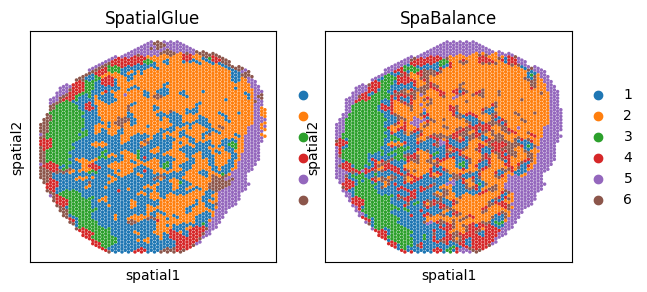

In [19]:
fig, ax_list = plt.subplots(1, 2, figsize=(7, 3))
sc.pl.embedding(adata_sg, basis='spatial', color='SpatialGlue', ax=ax_list[0], title='SpatialGlue', s=25, show=False)
sc.pl.embedding(adata_sg, basis='spatial', color='SpaBalance_aligned', ax=ax_list[1], title='SpaBalance', s=25, show=False)


In [20]:
ground_truth = pd.read_csv('/data/workspace/ST/0_data/Data_SpatialGlue/annotation.csv', sep=',')
print(ground_truth.shape)
ground_truth.head()

(3484, 2)


,Barcode,manual-anno
0,AACACTTGGCAAGGAA-1,medulla sinuses
1,AACAGGATTCATAGTT-1,medulla sinuses
2,AACAGGTTATTGCACC-1,medulla cords
3,AACAGGTTCACCGAAG-1,medulla cords
4,AACAGTCAGGCTCCGC-1,cortex


In [21]:
import pandas as pd

# 1. 重新读取，并明确将 'Barcode' 列设为索引
ground_truth = pd.read_csv(
    '/data/workspace/ST/0_data/Data_SpatialGlue/annotation.csv', 
    sep=',', 
    index_col=0  # 强制将第一列 (Barcode) 设为索引
)

# 2. 检查索引是否与 adata 一致
print("Annotation 索引示例:", ground_truth.index[0])
print("AnnData 索引示例:", adata_sg.obs_names[0])


Annotation 索引示例: AACACTTGGCAAGGAA-1
AnnData 索引示例: AACACTTGGCAAGGAA-1


In [22]:
# 3. 只有在索引一致的情况下执行赋值
# 这样 Pandas 就会根据相同的 Barcode 自动把 'manual-anno' 填入对应的行
adata_sg.obs['ground_truth'] = ground_truth['manual-anno']

# 4. 验证结果
print("\n--- 验证结果 ---")
print(adata_sg.obs['ground_truth'].value_counts())


--- 验证结果 ---
medulla cords                  1188
medulla sinuses                 797
cortex                          753
pericapsular adipose tissue     320
capsule                         204
subcapsular sinus                74
follicle                         60
medulla vessels                  57
hilum                            23
trabeculae                        8
Name: ground_truth, dtype: int64


In [23]:
from sklearn.metrics import adjusted_rand_score

# 计算 SpatialGlue 的准确度
ari_sg = adjusted_rand_score(adata_sg.obs['ground_truth'], adata_sg.obs['SpatialGlue'])

# 计算 SpaBalance 的准确度
ari_sb = adjusted_rand_score(adata_sg.obs['ground_truth'], adata_sg.obs['SpaBalance_mclust'])

print(f"SpatialGlue 的 ARI (vs GT): {ari_sg:.4f}")
print(f"SpaBalance 的 ARI (vs GT): {ari_sb:.4f}")



SpatialGlue 的 ARI (vs GT): 0.3086
SpaBalance 的 ARI (vs GT): 0.2564


<AxesSubplot:title={'center':'Ground Truth'}, xlabel='spatial1', ylabel='spatial2'>

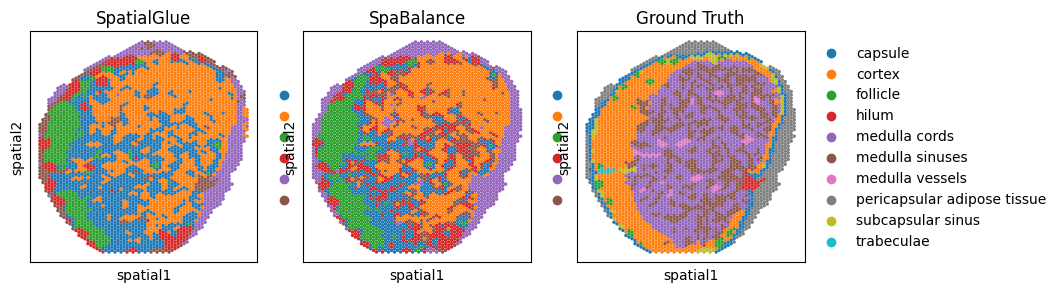

In [24]:
fig, ax_list = plt.subplots(1, 3, figsize=(10, 3))
sc.pl.embedding(adata_sg, basis='spatial', color='SpatialGlue', ax=ax_list[0], title='SpatialGlue', s=25, show=False)
sc.pl.embedding(adata_sg, basis='spatial', color='SpaBalance_aligned', ax=ax_list[1], title='SpaBalance', s=25, show=False)
sc.pl.embedding(adata_sg, basis='spatial', color='ground_truth', ax=ax_list[2], title='Ground Truth', s=25, show=False)

In [25]:
# we set 'mclust' as clustering tool by default. Users can also select 'leiden' and 'louvain'
from SpaBalance.utils import clustering
tool = 'mclust' # mclust, leiden, and louvain
clustering(adata_sg, key='emb_latent_omics1', add_key='sg_emb_latent_omics1', n_clusters=6, method=tool, use_pca=True)
clustering(adata_sg, key='emb_latent_omics2', add_key='sg_emb_latent_omics2', n_clusters=6, method=tool, use_pca=True)


fitting ...
  |                                                                      |   0%

  |======================================================================| 100%
fitting ...
  |======================================================================| 100%


In [26]:
adata_sg

AnnData object with n_obs × n_vars = 3484 × 17954
    obs: 'mclust', 'SpatialGlue', 'SpaBalance_mclust', 'SpaBalance_aligned', 'ground_truth', 'sg_emb_latent_omics1', 'sg_emb_latent_omics2'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'adj_spatial', 'hvg', 'log1p', 'SpatialGlue_colors', 'SpaBalance_aligned_colors', 'ground_truth_colors'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'adj_feature', 'alpha', 'alpha_omics1', 'alpha_omics2', 'emb_latent_omics1', 'emb_latent_omics2', 'feat', 'spatial', 'SpaBalance_emb_latent_omics1', 'SpaBalance_emb_latent_omics2', 'omics1_pca_feat', 'omics2_pca_feat', 'emb_latent_omics1_pca', 'emb_latent_omics2_pca'

<AxesSubplot:title={'center':'protein'}, xlabel='spatial1', ylabel='spatial2'>

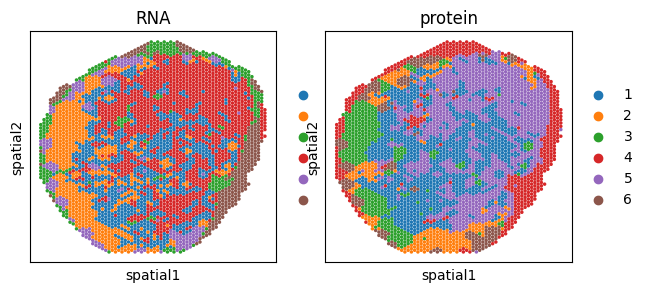

In [27]:
fig, ax_list = plt.subplots(1, 2, figsize=(7, 3))
sc.pl.embedding(adata_sg, basis='spatial', color='sg_emb_latent_omics1', ax=ax_list[0], title='RNA', s=25, show=False)
sc.pl.embedding(adata_sg, basis='spatial', color='sg_emb_latent_omics2', ax=ax_list[1], title='protein', s=25, show=False)

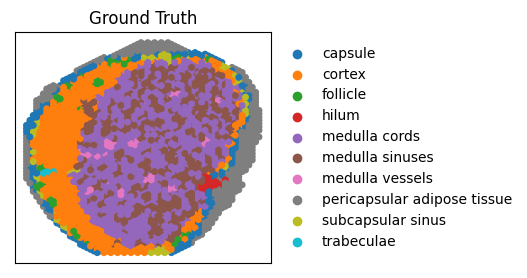

In [28]:
import matplotlib.pyplot as plt
import scanpy as sc

# 1. 关键：手动创建一个较小的、比例偏长的画布 (例如 4x3)
# 之前的子图 figsize=(7, 3) 包含两个图，所以单图 3.5x3 是最接近原始比例的
fig, ax = plt.subplots(figsize=(3.3, 3))

# 2. 调用绘图函数
sc.pl.embedding(
    adata_sg, 
    basis='spatial', 
    color='ground_truth', 
    title='Ground Truth', 
    s=100,              # 把 s 从 25 增加到 100，点变大后颜色会显得非常“浓”
    ax=ax,              # 指定画在上面创建的 ax 上
    show=False,
    frameon=True
)

# 3. 移除坐标轴标签（让画面更干净，风格对齐子图）
ax.set_xlabel('')
ax.set_ylabel('')

# 4. 强制显示
plt.show()

/tmp/ipykernel_520058/2259977500.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mi, x='Method', y='Moran\'s I', palette='Set2', width=0.3)


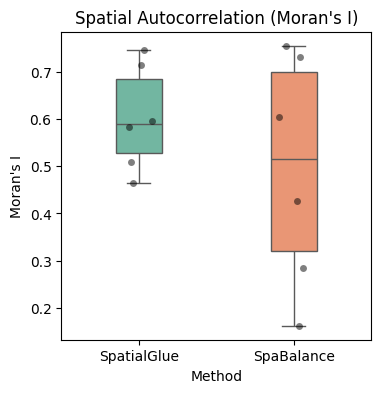

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from esda.moran import Moran
from libpysal.weights import KNN

def calculate_morans_i(adata, cluster_key):
    # 1. 构建空间权重矩阵 (基于空间坐标的 KNN)
    # 假设你的空间坐标在 adata.obsm['spatial']
    w = KNN.from_array(adata.obsm['spatial'], k=6)
    w.transform = 'R'
    
    morans_results = []
    clusters = adata.obs[cluster_key].unique()
    
    # 2. 对每个簇计算其二值化分布的空间自相关性
    for cluster in clusters:
        # 将属于该簇的细胞设为 1，其余为 0
        y = (adata.obs[cluster_key] == cluster).astype(int).values
        mi = Moran(y, w)
        morans_results.append(mi.I)
    
    return morans_results

# 计算两种方法的结果
# 你的 adata_sg 中已经包含了两者的标签
mi_sg = calculate_morans_i(adata_sg, 'SpatialGlue')
mi_sb = calculate_morans_i(adata_sg, 'SpaBalance_aligned')

# 构建绘图 DataFrame
df_mi = pd.DataFrame({
    'Moran\'s I': mi_sg + mi_sb,
    'Method': ['SpatialGlue']*len(mi_sg) + ['SpaBalance']*len(mi_sb)
})

# 绘制箱线图
plt.figure(figsize=(4, 4))
sns.boxplot(data=df_mi, x='Method', y='Moran\'s I', palette='Set2', width=0.3)
sns.stripplot(data=df_mi, x='Method', y='Moran\'s I', color='black', alpha=0.5)
plt.title('Spatial Autocorrelation (Moran\'s I)')
plt.show()

In [30]:
# 假设你的 DataFrame 变量名是 df_mi
stats = df_mi.groupby('Method')['Moran\'s I'].median()

print("--- 各方法 Moran's I 中位数 ---")
print(stats)

# 如果你想看更详细的统计信息（中位数、均值、标准差等）
full_stats = df_mi.groupby('Method')['Moran\'s I'].describe()
print("\n--- 详细统计分布 ---")
print(full_stats)

--- 各方法 Moran's I 中位数 ---
Method
SpaBalance     0.516182
SpatialGlue    0.590044
Name: Moran's I, dtype: float64

--- 详细统计分布 ---
             count      mean       std       min       25%       50%  \
Method                                                                 
SpaBalance     6.0  0.494453  0.243202  0.162006  0.320517  0.516182   
SpatialGlue    6.0  0.602463  0.110933  0.464898  0.527331  0.590044   

                  75%       max  
Method                           
SpaBalance   0.700161  0.755566  
SpatialGlue  0.684592  0.747257  


In [31]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_jaccard_index(adata, joint_obsm, raw_obsm, k=20):
    """
    计算两个特征空间中 K 最近邻的重叠比例
    """
    # 1. 计算联合空间的邻居
    nn_joint = NearestNeighbors(n_neighbors=k).fit(adata.obsm[joint_obsm])
    indices_joint = nn_joint.kneighbors(return_distance=False)
    
    # 2. 计算原始模态空间的邻居
    nn_raw = NearestNeighbors(n_neighbors=k).fit(adata.obsm[raw_obsm])
    indices_raw = nn_raw.kneighbors(return_distance=False)
    
    # 3. 计算每个点的 Jaccard 相似度
    scores = []
    for i in range(adata.n_obs):
        set_joint = set(indices_joint[i])
        set_raw = set(indices_raw[i])
        intersection = len(set_joint.intersection(set_raw))
        union = len(set_joint.union(set_raw))
        scores.append(intersection / union)
        
    return np.mean(scores)

# --- 开始计算 ---
# 假设 adata_sg 的 obsm 包含：'SpatialGlue_pca', 'SpaBalance_pca', 'emb_latent_omics1', 'emb_latent_omics2'
#

# 针对 SpatialGlue
j_rna_sg = get_jaccard_index(adata_sg, 'omics1_pca_feat', 'emb_latent_omics1')
j_prot_sg = get_jaccard_index(adata_sg, 'omics2_pca_feat', 'emb_latent_omics2')

# 针对 SpaBalance
j_rna_sb = get_jaccard_index(adata_sg, 'omics1_pca_feat', 'SpaBalance_emb_latent_omics1')
j_prot_sb = get_jaccard_index(adata_sg, 'omics2_pca_feat', 'SpaBalance_emb_latent_omics2')

data = {
    'RNA-joint': [j_rna_sb, j_rna_sg],    # 对应参考图中的蓝色部分
    'Protein-joint': [j_prot_sb, j_prot_sg] # 对应参考图中的绿色部分
}
methods = ['SpaBalance', 'SpatialGlue']

data


{'RNA-joint': [0.08260686654334234, 0.14735821482328545],
 'Protein-joint': [0.10506913832631469, 0.21672972112179187]}

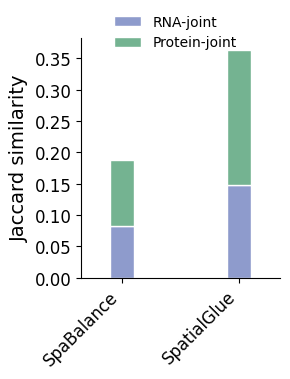

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 准备数据（使用你之前计算出的 j_rna_sg, j_prot_sg 等变量）
# 确保数据格式适合堆叠：行代表方法，列代表不同模态的得分
data = {
    'RNA-joint': [j_rna_sb, j_rna_sg],    # 对应参考图中的蓝色部分
    'Protein-joint': [j_prot_sb, j_prot_sg] # 对应参考图中的绿色部分
}
methods = ['SpaBalance', 'SpatialGlue']

df_stacked = pd.DataFrame(data, index=methods)

# 2. 绘制堆叠柱状图
# 设置画布大小和风格，模仿参考图的简洁感
fig, ax = plt.subplots(figsize=(3, 4))

df_stacked.plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    color=['#8e9bcc', '#74b391'], # 模仿参考图的莫兰迪色系：淡蓝与淡绿
    width=0.2,
    edgecolor='white'
)

# 3. 细节调整：还原参考图风格
ax.set_ylabel('Jaccard similarity', fontsize=14)
##ax.set_title('Neighborhood Conservation', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12) # X轴标签倾斜
plt.yticks(fontsize=12)

# 移除上方和右侧的边框 (Spines)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 调整图例位置
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(0.1, 1.15), ncol=1)

plt.tight_layout()
plt.show()